## Classifier Trained on COVID-19 Data

In [39]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# Load all confirmed cases
all_confirmed_cases = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
# Reduce time series to confirmed cases to only US
is_us = all_confirmed_cases['Country/Region']=='US'
us_confirmed_cases = all_confirmed_cases[is_us]
us_confirmed_cases = us_confirmed_cases.drop(columns=["Country/Region", "Province/State", "Lat", "Long"])
us_confirmed_cases = us_confirmed_cases.sum(axis=0)
us_confirmed_cases = us_confirmed_cases.to_frame()


In [40]:
us_confirmed_cases['day'] = us_confirmed_cases.reset_index().index
us_confirmed_cases.rename(columns={0: 'cases'}, inplace=True)
us_confirmed_cases.head(15)

,cases,day
1/22/20,1,0
1/23/20,1,1
1/24/20,2,2
1/25/20,2,3
1/26/20,5,4
1/27/20,5,5
1/28/20,5,6
1/29/20,5,7
1/30/20,5,8
1/31/20,7,9


### Picking a training and test set

<IPython.core.display.Javascript object>


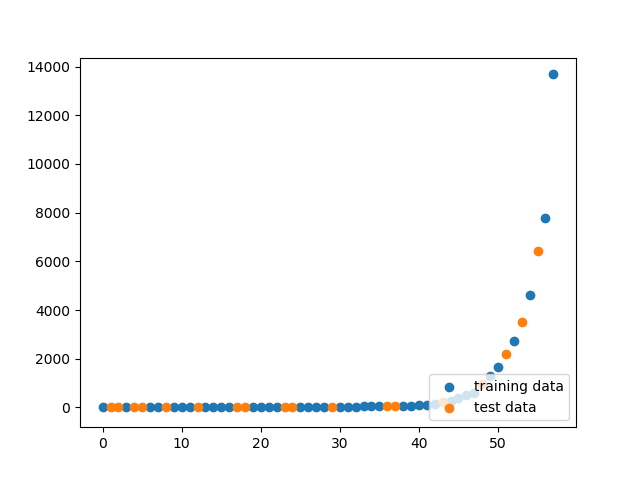

In [41]:
X = us_confirmed_cases['day']
y = us_confirmed_cases['cases']

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.3, random_state=20)

def scatter_plot():
    import matplotlib.pyplot as plt
    %matplotlib notebook
    plt.figure()
    plt.scatter(X_train, y_train, label='training data')
    plt.scatter(X_test, y_test, label='test data')
    plt.legend(loc=4);

scatter_plot()

DAY_RANGE = int(X.size * 1.2)
   

In [42]:
def make_predictions():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures

    # Create the linrange input
    lin_test = np.arange(DAY_RANGE)
    
    # Calculate the different polynomial predictions
    predictions = np.zeros(shape=(2, DAY_RANGE))
    for i, degree in enumerate([4, 9]):
        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
        linreg = LinearRegression().fit(X_train_poly, y_train)
        predictions[i, :] = linreg.predict(poly.fit_transform(lin_test.reshape(-1,1)))
    
    return predictions

### Plotting predictions from a polynomial classifier for different degrees

<IPython.core.display.Javascript object>


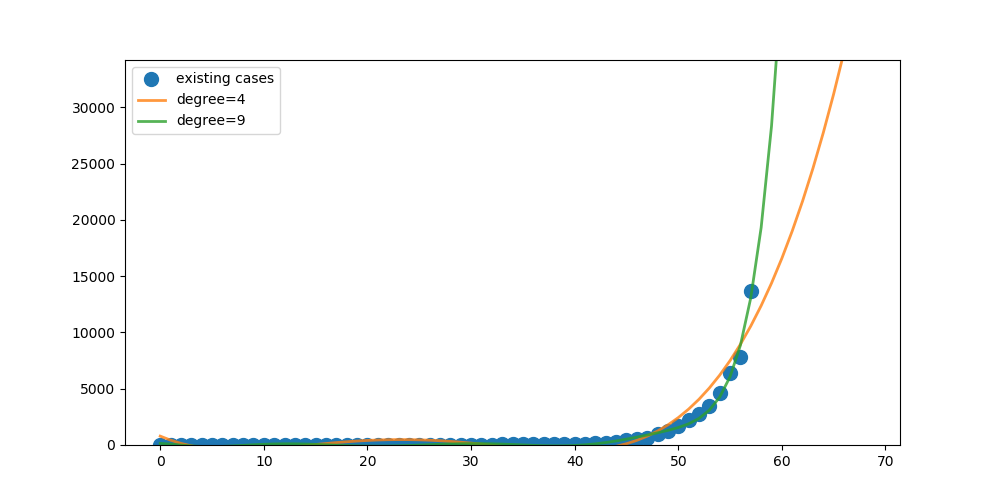

In [43]:
MAX_CASES = int(np.amax(y) * 2.5)

def plot_one(degree_predictions):
    import matplotlib.pyplot as plt
    %matplotlib notebook
    plt.figure(figsize=(10,5))
    #plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    #plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    plt.plot(X, y, 'o', label='existing cases', markersize=10)
    for i,degree in enumerate([4,9]):
        plt.plot(np.arange(DAY_RANGE), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
    plt.ylim(0,MAX_CASES)
    plt.legend(loc=2)

plot_one(make_predictions())